In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os
import pandas as pd
import numpy as np


def plot(
    algorithm,
    metric=None,
    *,
    samples=15000,
    scores=None,
    saved_runs=None,
    save_fig=False,
    transparent=False,
    **kwargs,
):

    saved_runs_means = saved_runs
    scores_means = scores
    plt.figure(figsize=(18, 9))

    # Find the vertical line where saved runs become negative
    negative_indices = [
        i for i, saved_run in enumerate(saved_runs_means) if saved_run < 0
    ]

    if negative_indices:
        negative_index = negative_indices[
            -1
        ]  # Find the last index where saved runs are negative
        # Perform linear interpolation
        print(scores_means[negative_index], saved_runs_means[negative_index])
        x1 = scores_means[negative_index]
        y1 = saved_runs_means[negative_index]
        if metric == "wbce":
            factor = -1
        else:
            factor = 1
        x2 = scores_means[negative_index + factor]
        y2 = saved_runs_means[negative_index + factor]

        x_zero_cross = x1 + (0 - y1) / (y2 - y1) * (x2 - x1)

        plt.axvline(
            x=x_zero_cross,
            color="#EC6602",
            linestyle="--",
            linewidth=1.5,
            label="_nolegend_",
        )
        plt.axhline(
            y=0,
            color="#EC6602",
            linestyle="--",
            linewidth=1.5,
            label="_nolegend_",
        )
        x_zero_cross = f"{x_zero_cross:.4f}"
        plt.axhline(y=0, color="#EC6602", linestyle="--", linewidth=1.5)

    else:
        x_zero_cross = None

    plt.legend(
        [f"Samples: {samples}\nThreshold: {x_zero_cross}"],
        loc="upper right",
        fontsize=10,
        frameon=False,
        shadow=False,
        title="Info",
        title_fontsize="20",
    )
    # plt.title('Saved Runs Vs Model Scores using Hit Or Miss Algorithm', fontsize=20)
    if metric == "Weighted Binary Crossentropy Loss":
        plt.xlabel(f"Loss Values ({metric})", fontsize=25)
    else:
        plt.xlabel(f"Score Values ({metric})", fontsize=25)
    plt.ylabel("Saved Runs", fontsize=25)

    ax = plt.gca()

    plt.grid(True)

    ax.yaxis.set_major_locator(MaxNLocator(nbins=25))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=13))

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # Remove borders
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    # plt.ylim(-16, 0.90)
    # plt.xlim(0, 1)
    plt.plot(
        scores_means,
        saved_runs_means,
        marker="o",
        linestyle="--",
        color="#009999",
        label="_nolegend_",
        linewidth=2,
        **kwargs,
    )

    if save_fig:
        if transparent:
            transparency = "transparent"
        else:
            transparency = "non-transparent"

        directory = "Graphs/"

        if not os.path.exists(directory):
            os.makedirs(directory)

        plt.savefig(
            os.path.join(directory, f"{algorithm}_{transparency}_{metric}.png"),
            transparent=transparent,
            dpi=100,
        )

    # make the y-axis a percentage
    # plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))

    # plt.show();

In [119]:
# algs = ["equilibrium", "hom"]
# metrics = ["b3s", "f1", "htp", "wbce"]

# def plot_all():
#     for alg in algs:
#         for metric in metrics:
#             df = pd.read_csv(f"results/{alg}_{metric}_plot.csv")
#             df = df.sort_values("score_avg")
#             plot(
#                 algorithm=alg,
#                 metric=metric,
#                 # metric='Harmonic TNR Recall',
#                 samples=70000,
#                 scores=list(df["score_avg"]),
#                 saved_runs=list(df["saved_runs_avg"]),
#                 save_fig=True,
#                 transparent=True,
#                 markersize=9,
#             )

In [120]:
# plot_all()

In [121]:
# data = pd.read_csv("results/equilibrium_wbce_plot.csv")
# data = data.sort_values("score_avg")
# plot(
#     algorithm="Equilibrium",
#     metric="WBCE",
#     # metric='Harmonic TNR Recall',
#     samples=70000,
#     scores=list(data["score_avg"]),
#     saved_runs=list(data["saved_runs_avg"] * 100),
#     save_fig=True,
#     transparent=True,
#     markersize=9,
# )

In [122]:
# data = pd.read_csv(
#     "results/equilibrium_f1_plot.csv")
# data = data.sort_values("score_avg")
# plot(
#     algorithm="Equilibrium",
#     metric="F1",
#     # metric='Harmonic TNR Recall',
#     samples=70000,
#     scores=list(data["score_avg"]),
#     saved_runs=list(data["saved_runs_avg"] * 100),
#     save_fig=True,
#     transparent=True,
#     markersize=9,
# )

In [123]:
# data = pd.read_csv(
#     "results/equilibrium_b3s_plot.csv")
# data = data.sort_values("score_avg")
# plot(
#     algorithm="Equilibrium",
#     metric="B3S",
#     # metric='Harmonic TNR Recall',
#     samples=70000,
#     scores=list(data["score_avg"]),
#     saved_runs=list(data["saved_runs_avg"] * 100),
#     save_fig=True,
#     transparent=True,
#     markersize=9,
# )

0.9695316233242811 -0.10783730158730158


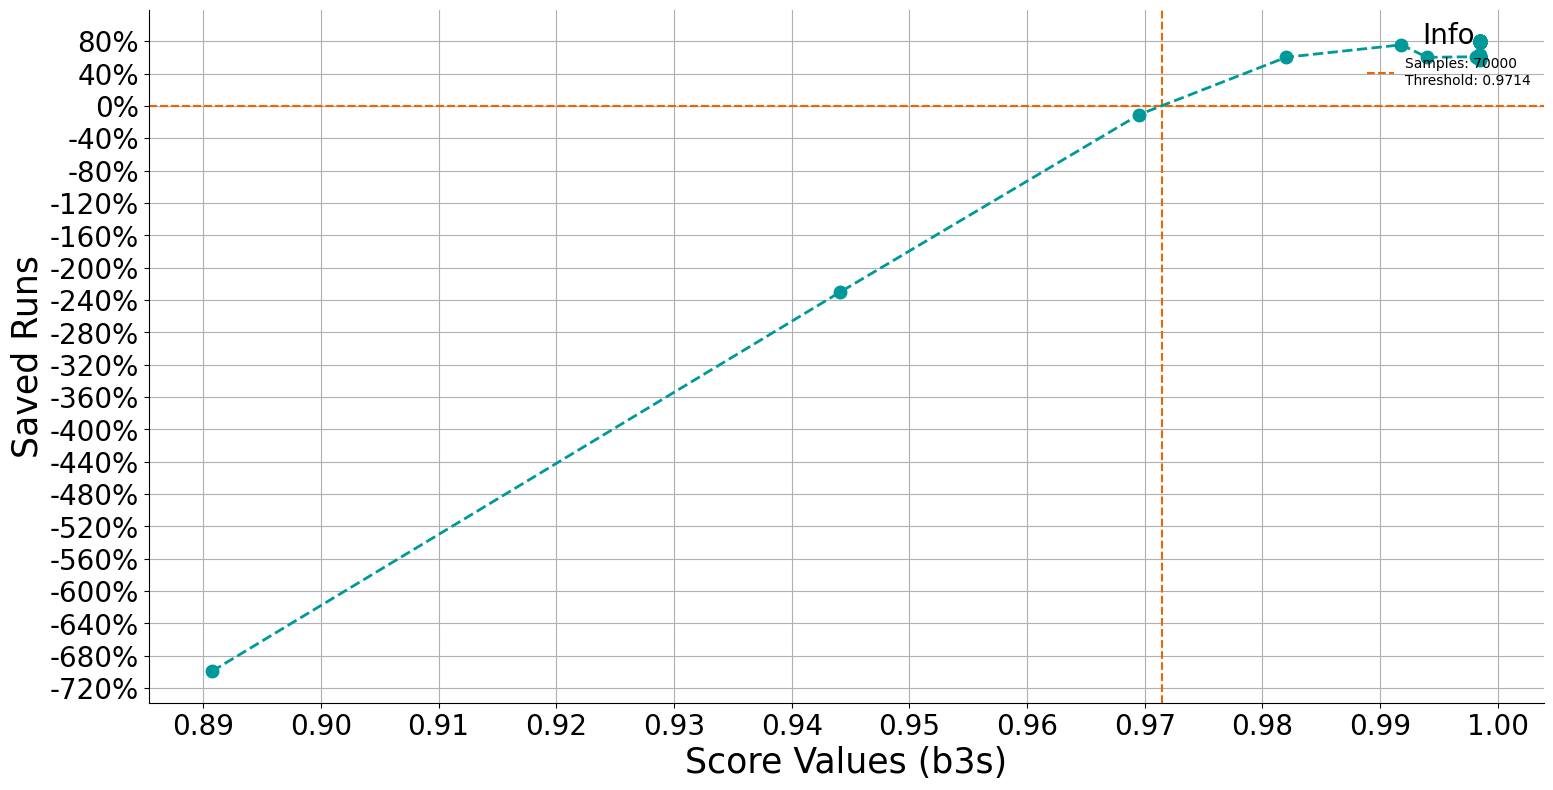

0.9833333333333333 -0.10783730158730158


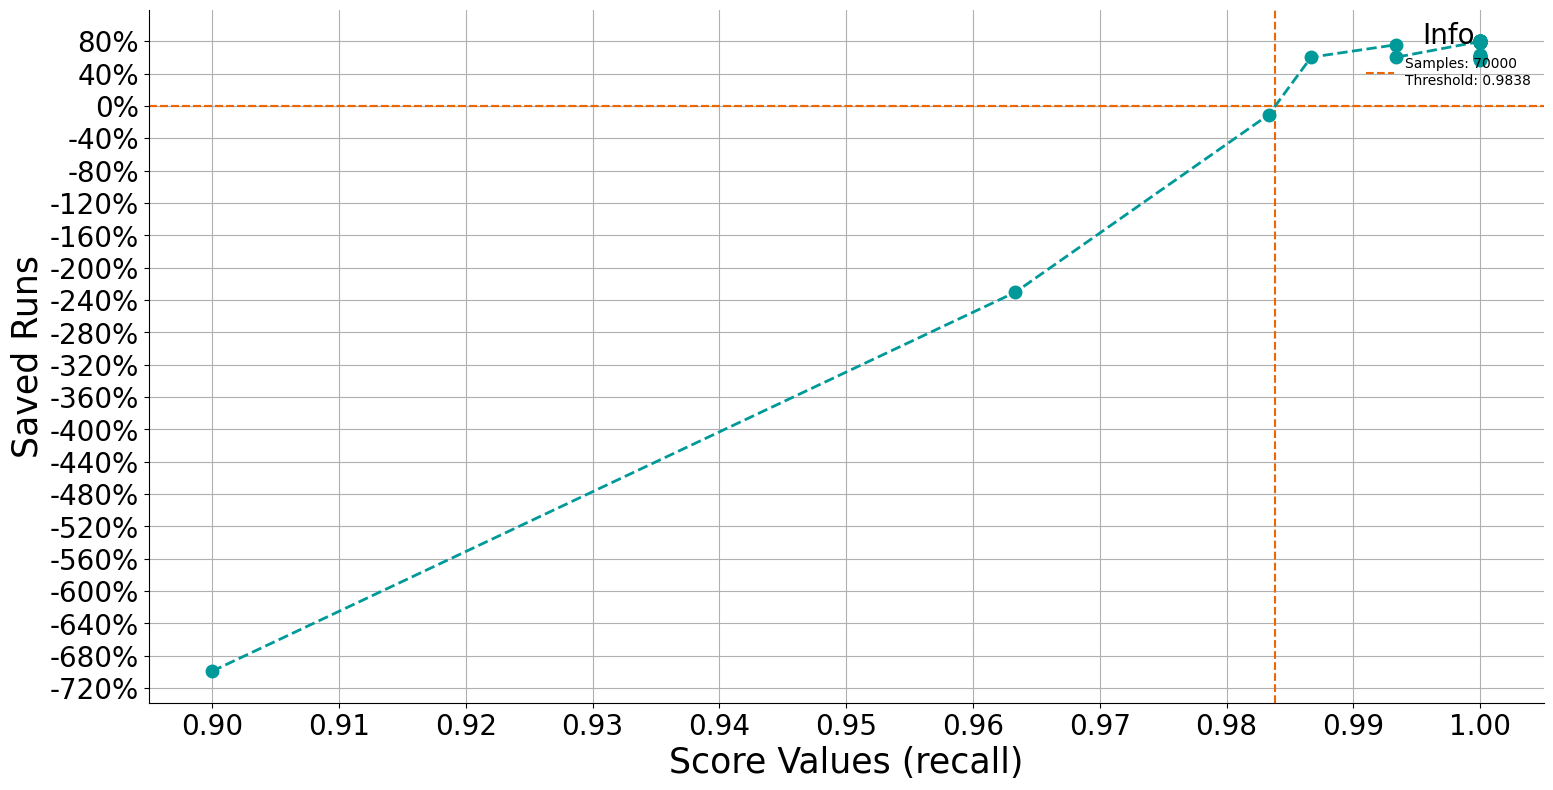

0.9561119920479019 -0.10783730158730158


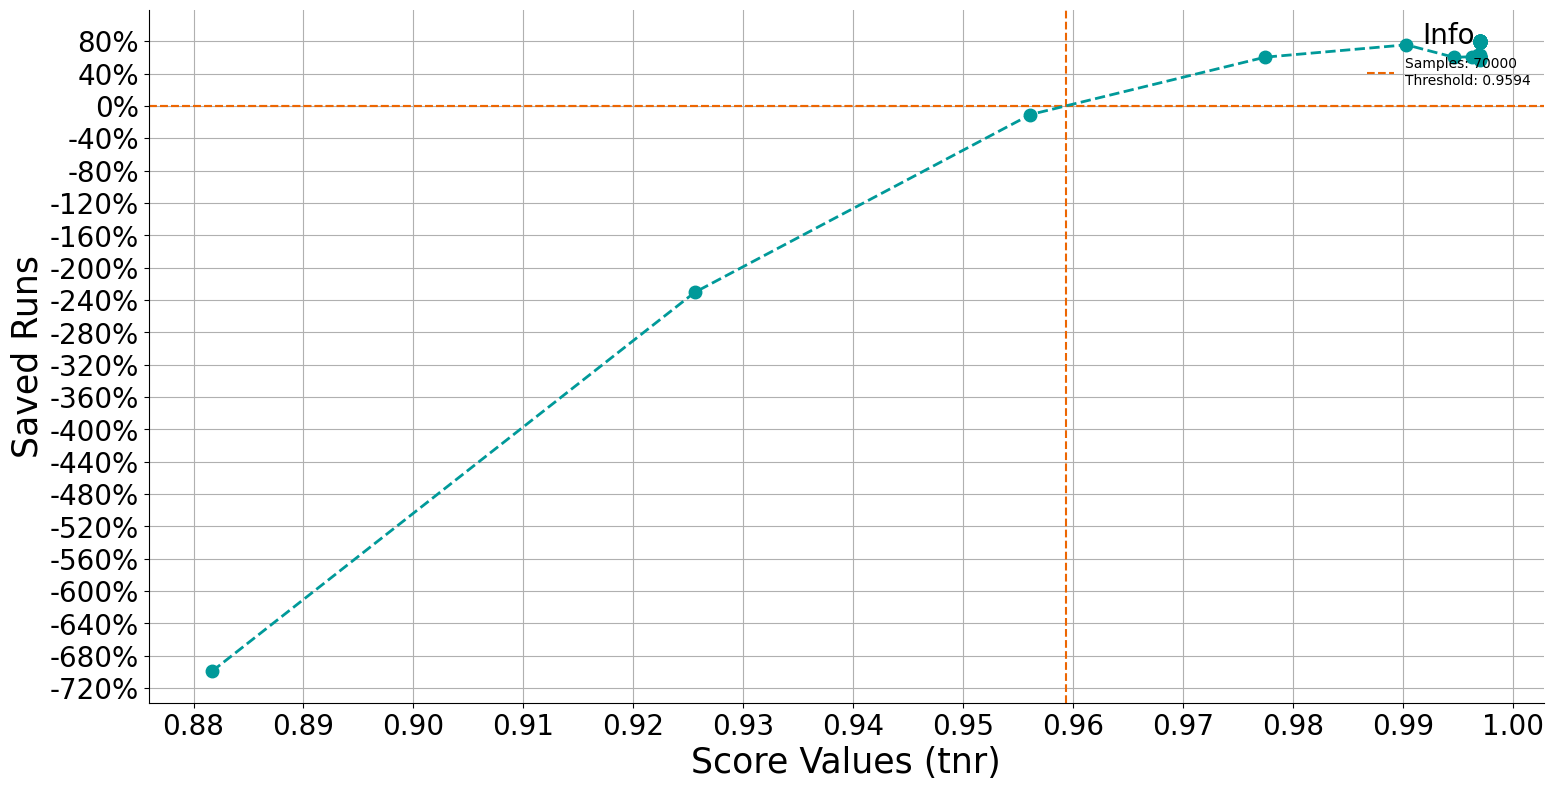

0.05979527659698249 -0.10783730158730158


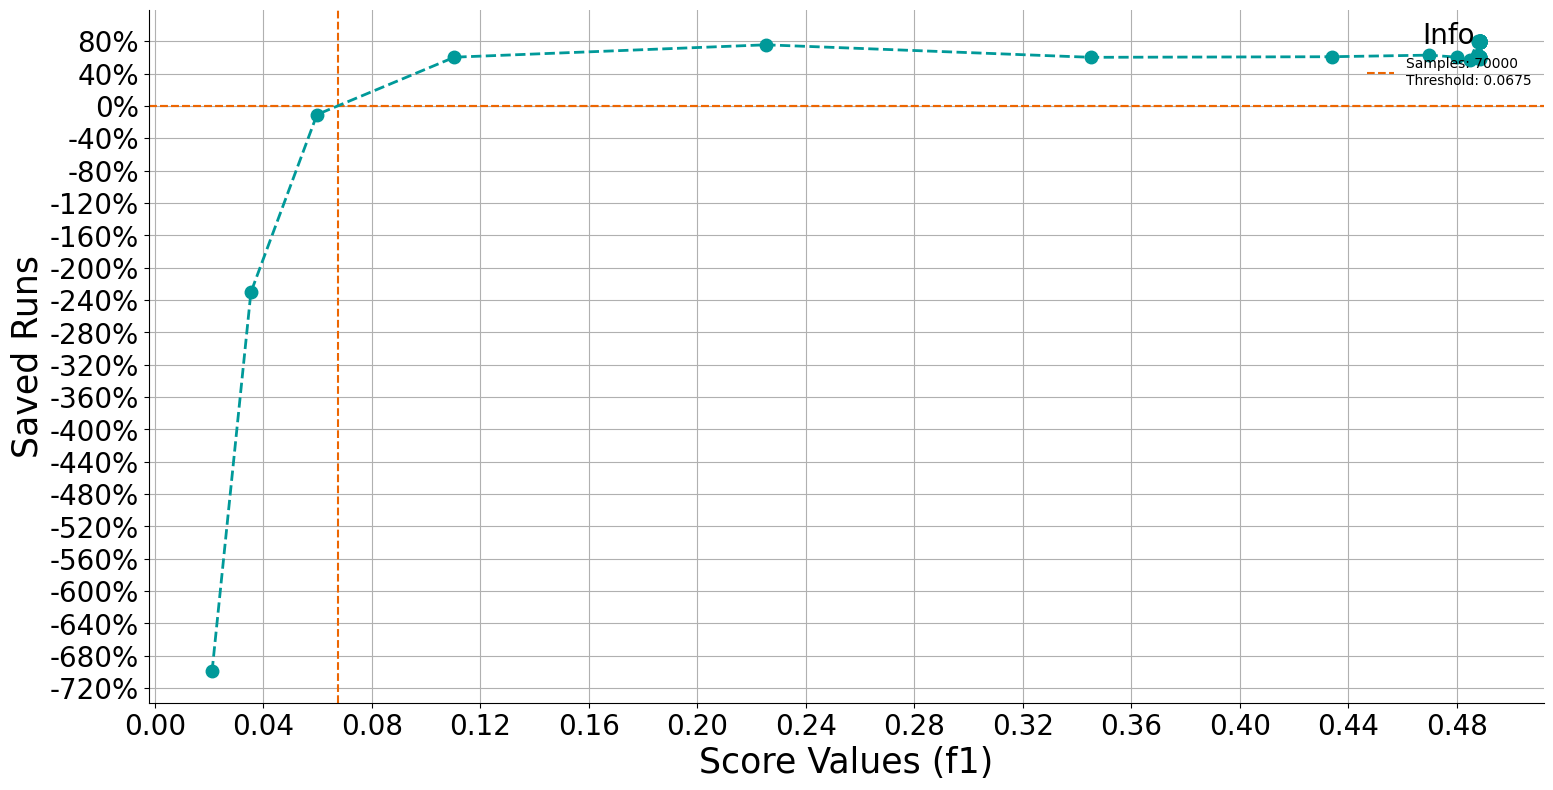

0.059743560217018495 -0.10783730158730158


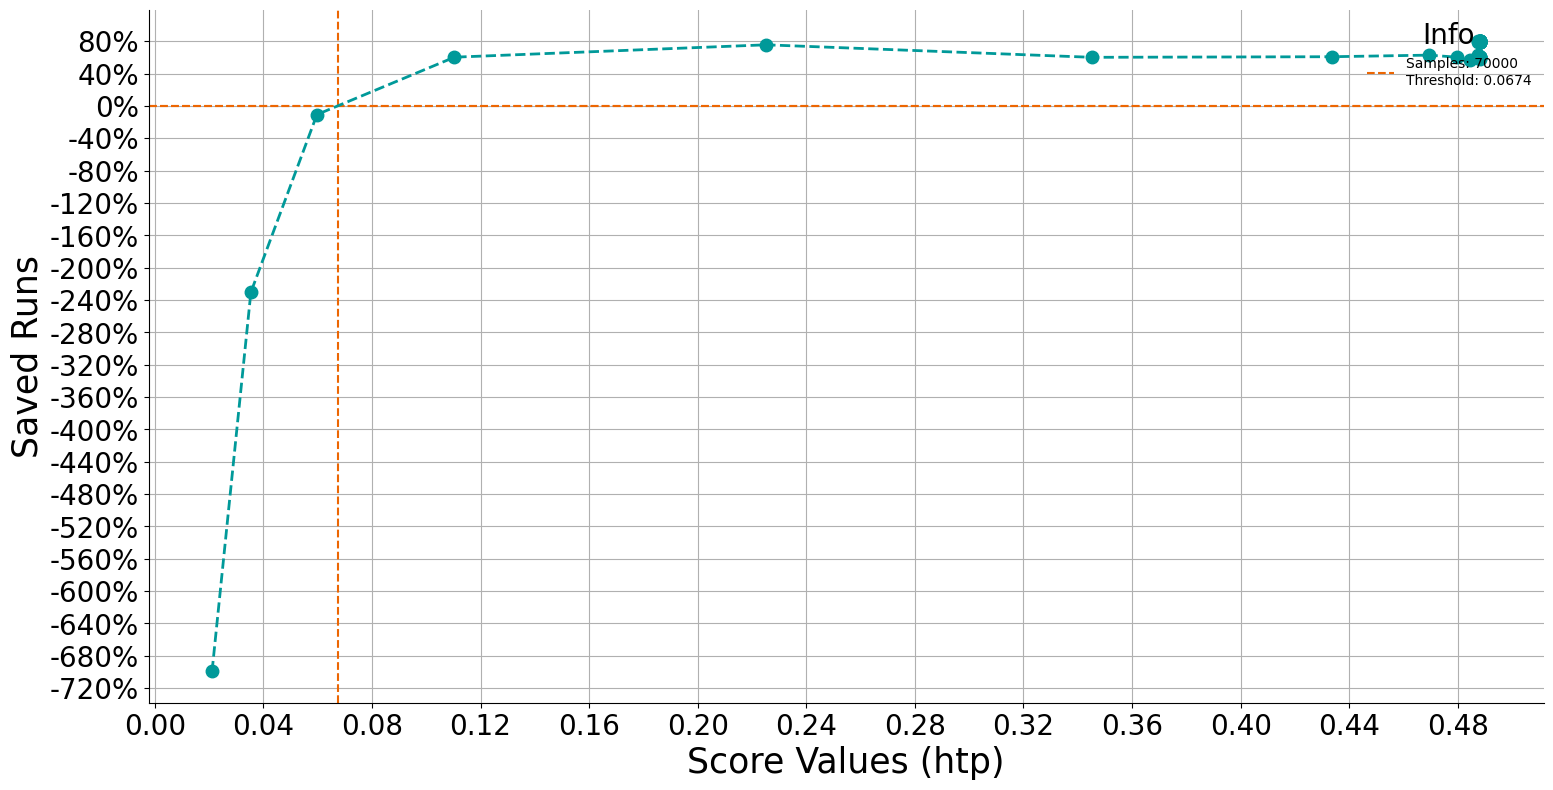

0.0035266706564019007 -6.992238095238094


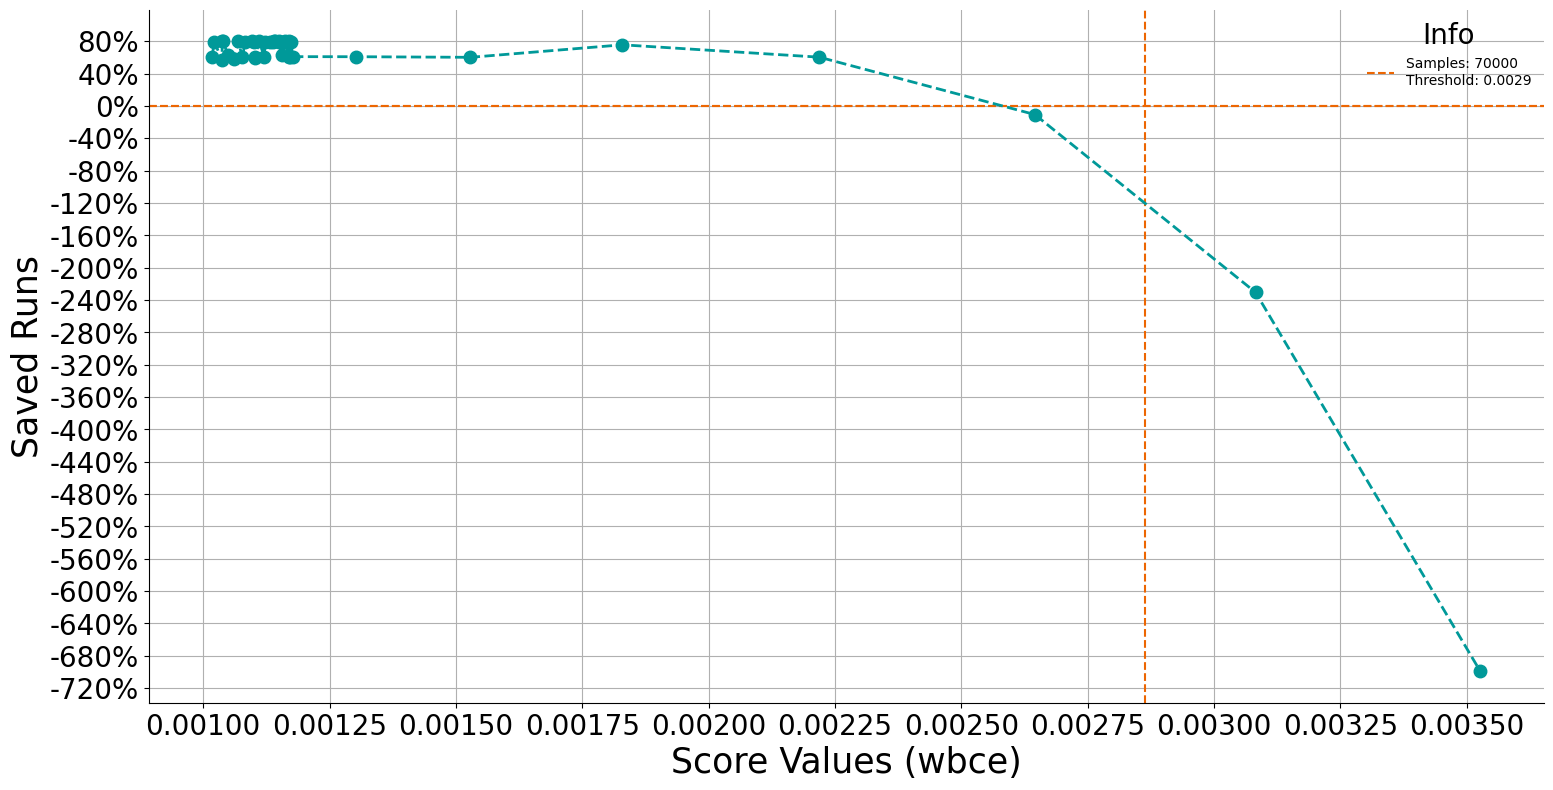

In [124]:
df = pd.read_pickle("results__hom.pkl")

def expand_dict_column(df, column):
    return 


df = pd.concat([df.drop(["score"], axis=1),
               df["score"].apply(pd.Series)], axis=1)

df["mean_saved_runs"] = df["saved_runs"].map(lambda x: np.mean(x))

metrics = ["b3s", "recall", "tnr", "f1", "htp", "wbce"]

for metric in metrics:
    df.sort_values(by=metric, inplace=True)
    plot(
        algorithm="HOM",
        metric=metric,
        samples=70000,
        scores=list(df[metric]),
        saved_runs=list(df["mean_saved_runs"]),
        save_fig=True,
        transparent=True,
        markersize=9,
    )

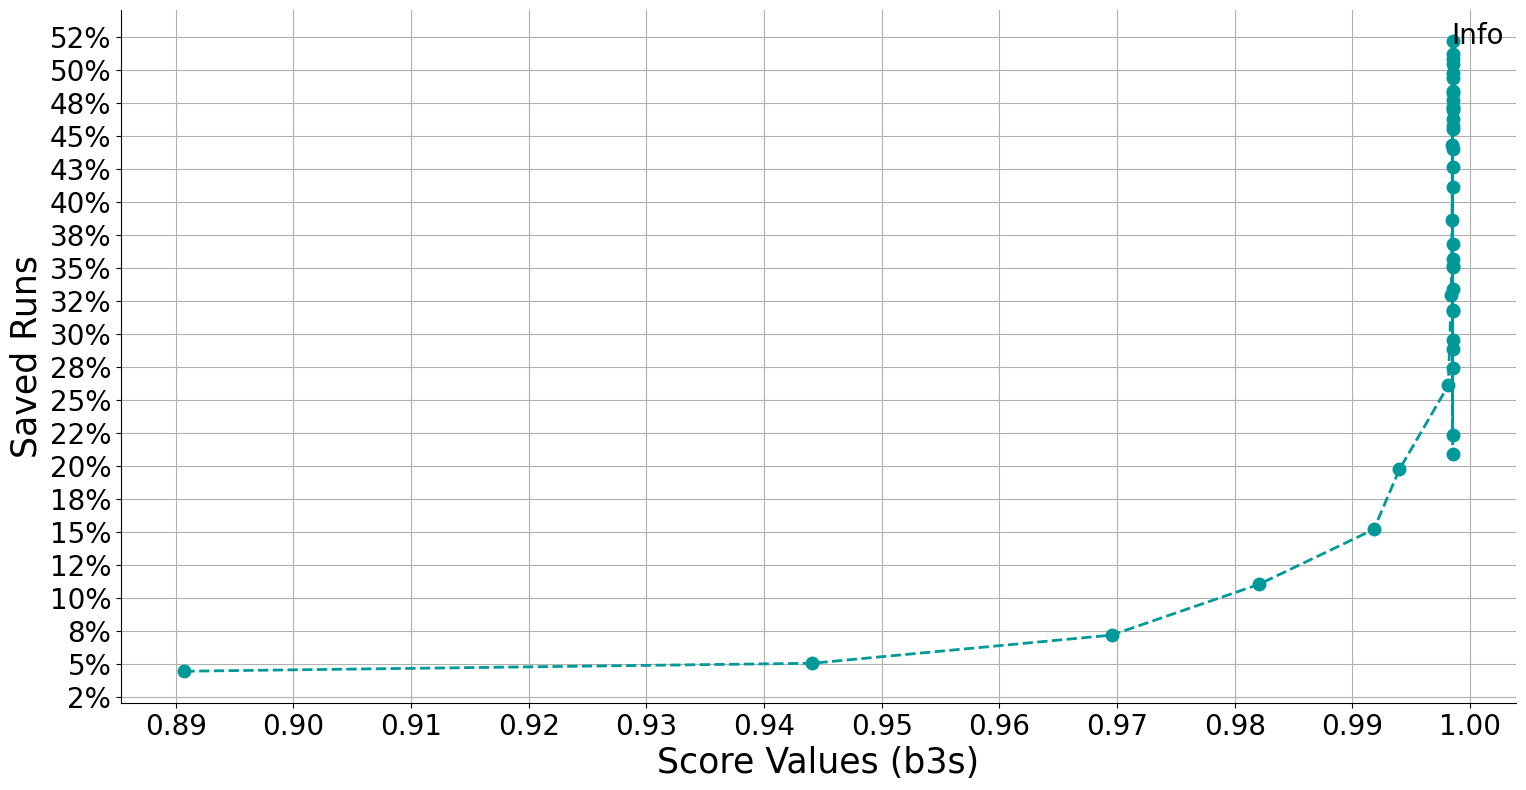

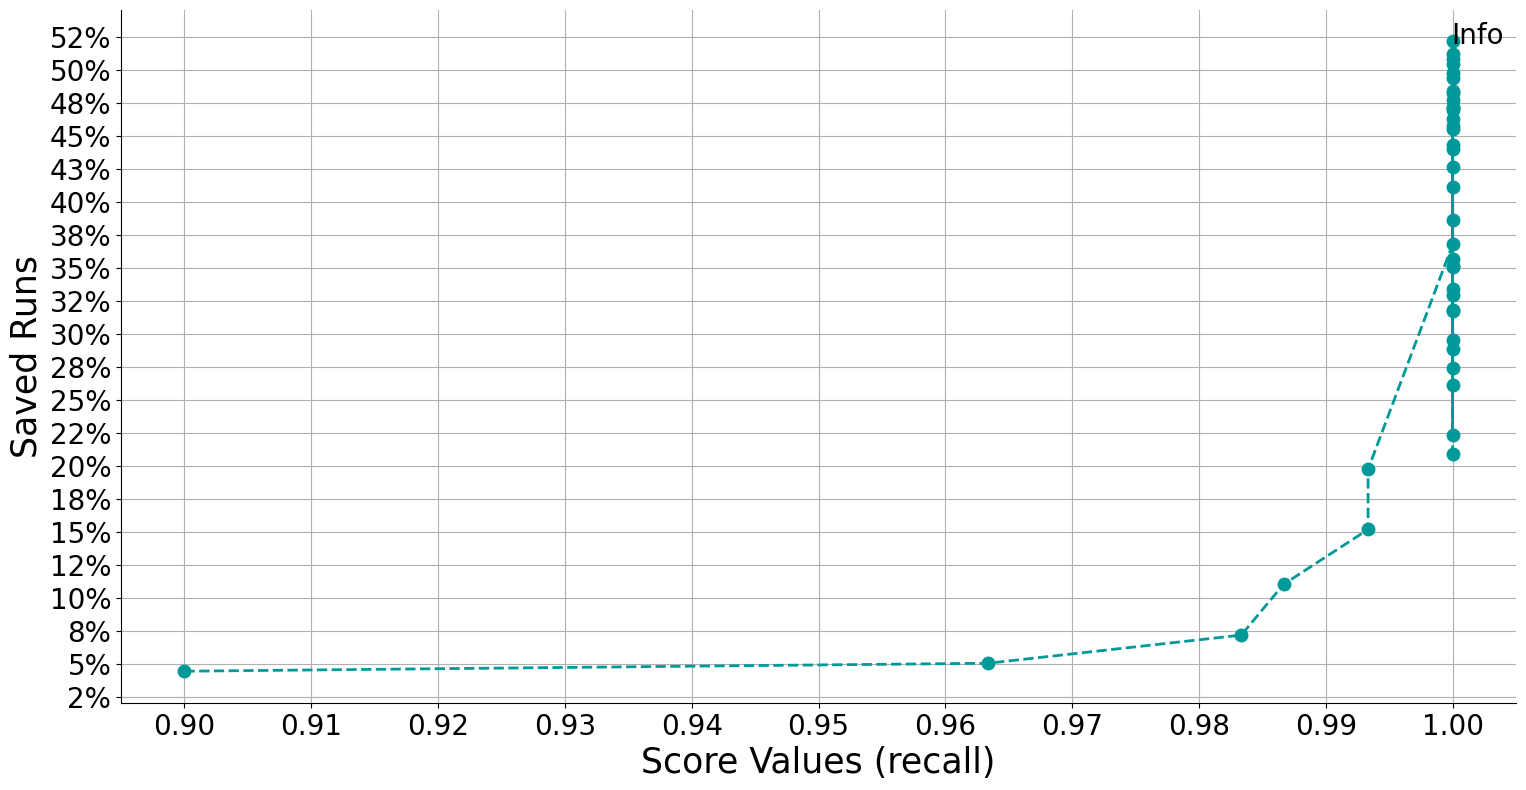

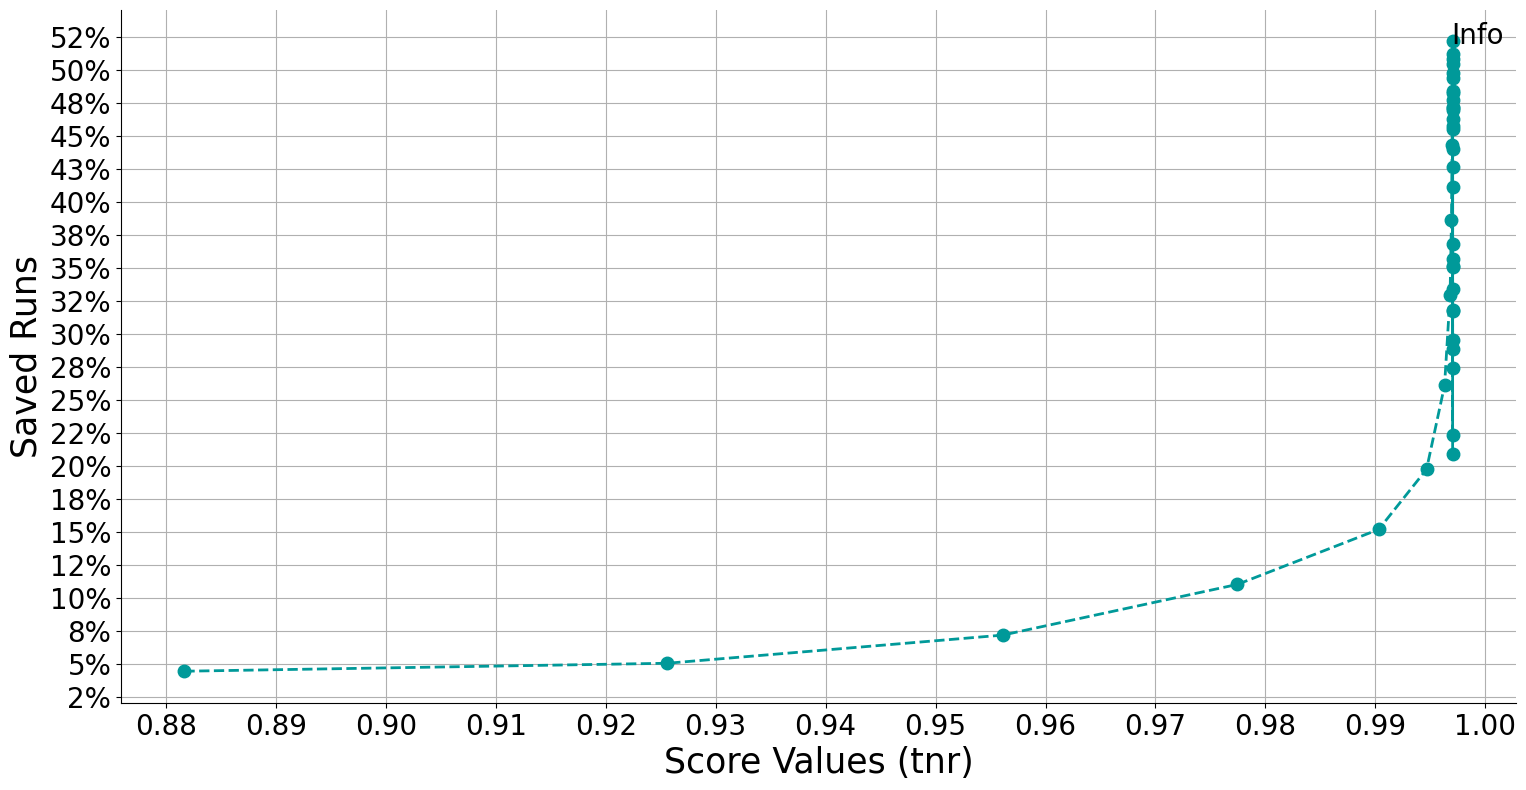

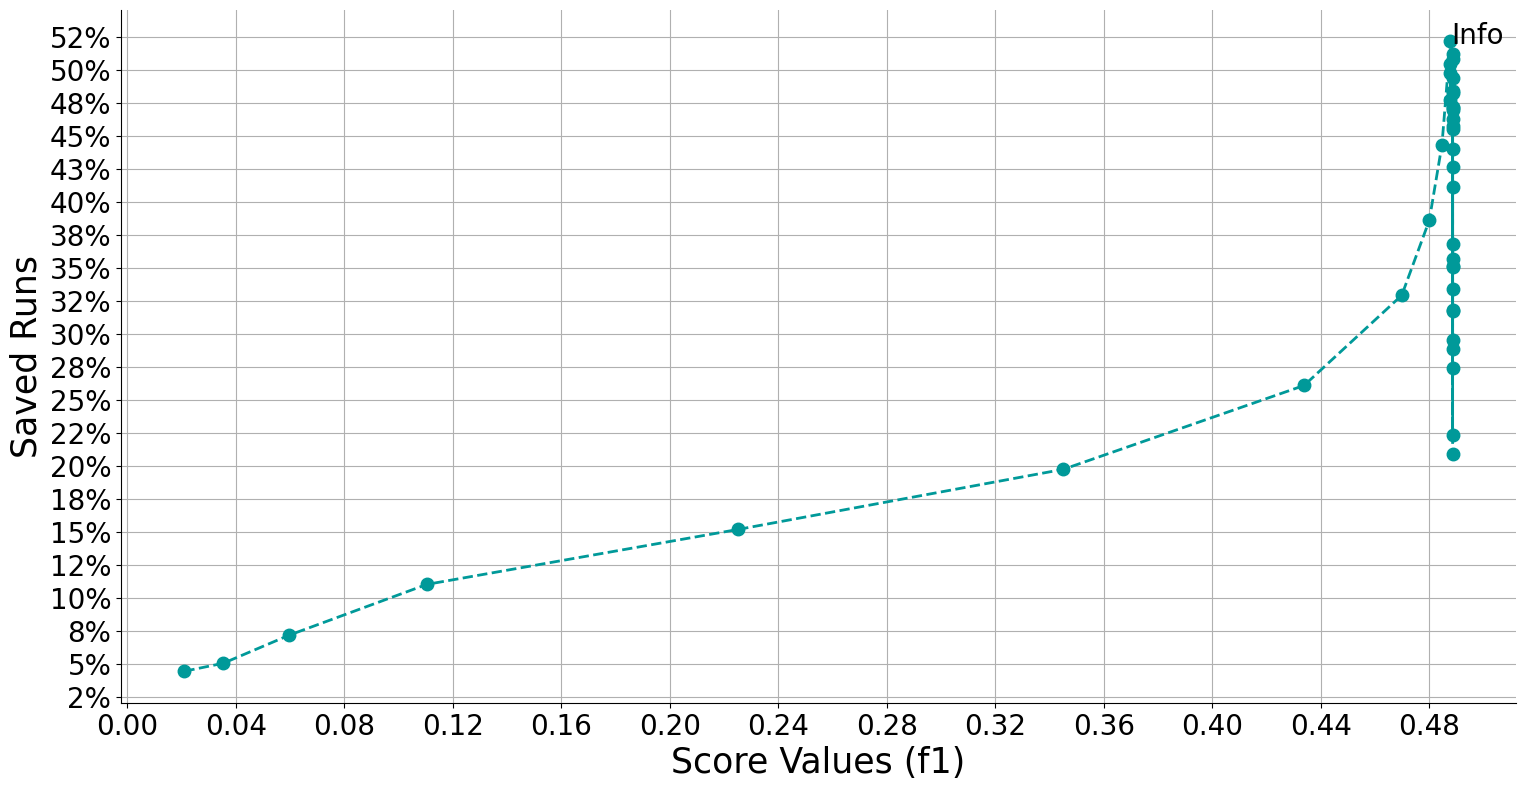

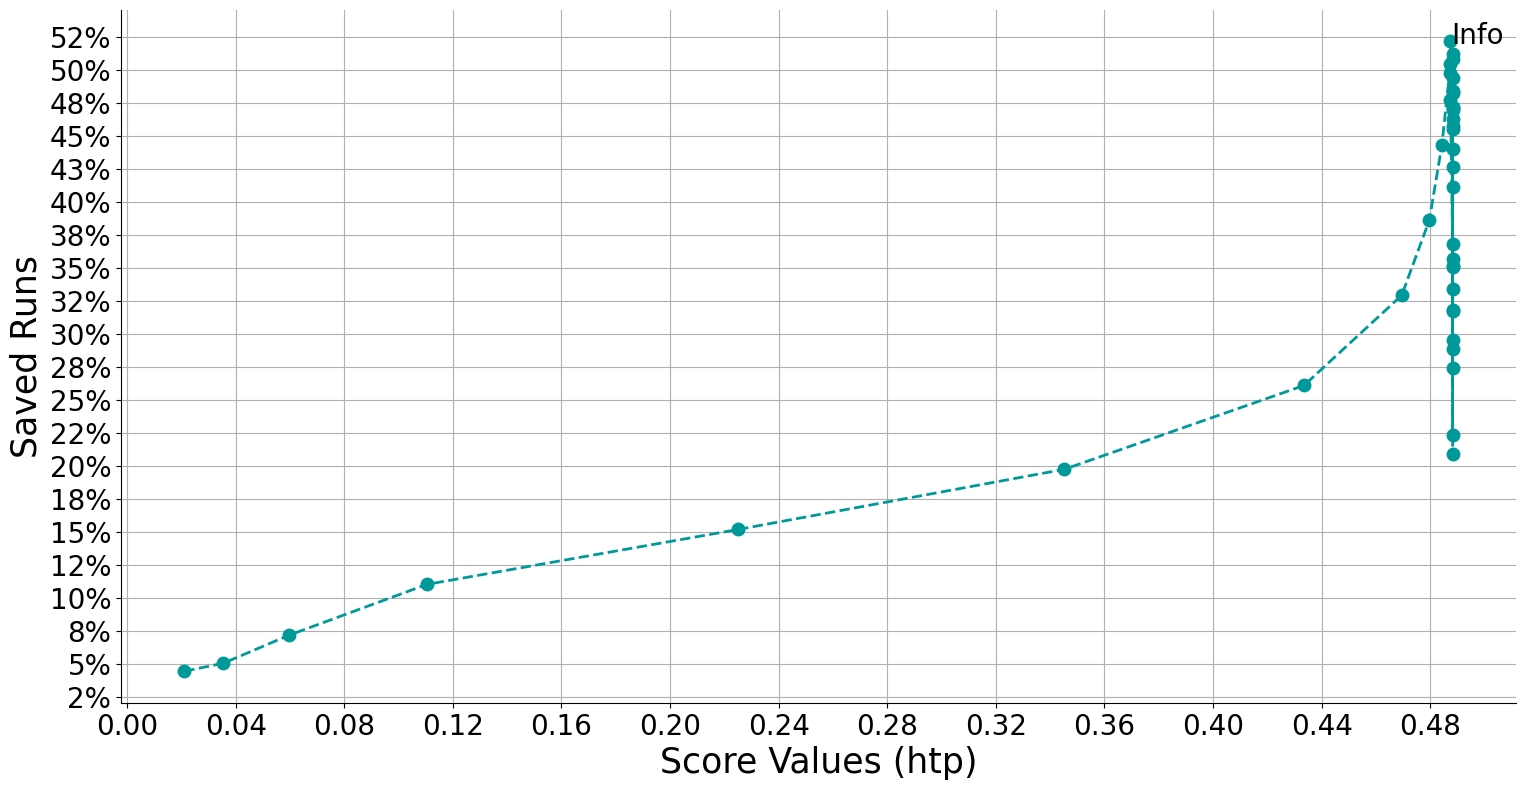

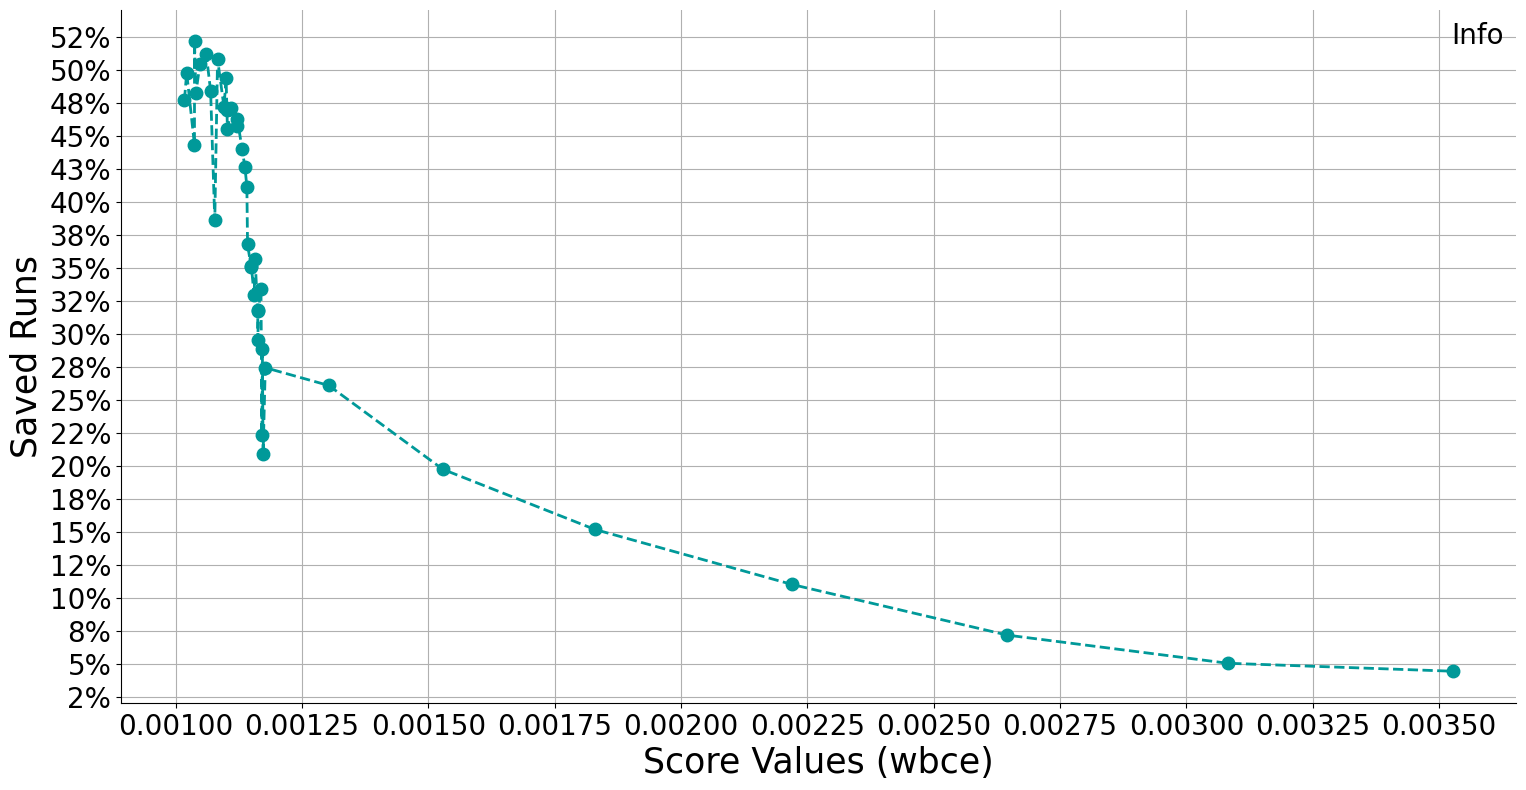

In [129]:
df = pd.read_pickle("results__equilibrium.pkl")


def expand_dict_column(df, column):
    return


df = pd.concat([df.drop(["score"], axis=1),
               df["score"].apply(pd.Series)], axis=1)

df["mean_saved_runs"] = df["saved_runs"].map(lambda x: np.mean(x))

metrics = ["b3s", "recall", "tnr", "f1", "htp", "wbce"]

for metric in metrics:
    df.sort_values(by=metric, inplace=True)
    plot(
        algorithm="Equilibrium",
        metric=metric,
        samples=70000,
        scores=list(df[metric]),
        saved_runs=list(df["mean_saved_runs"]),
        save_fig=True,
        transparent=True,
        markersize=9,
    )

In [125]:
sum(df["algorithm_runs"].sum()) / sum(df["binary_runs"].sum())

0.6742847050512186

In [126]:
df

,binary_runs,algorithm_runs,saved_runs,b3s,htp,f1,wbce,recall,tnr,mean_saved_runs
11,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 2, 7, 3, 7, 10, 4, 7, 9, 2, 4, 2, 2, 2,...","[0.6666666666666666, 1.0, 1.0, 0.375, 0.875, 0...",0.998507,0.487449,0.487805,0.001018,1.000000,0.997018,0.608056
12,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 4, 7, 2, 4, 10, 6, 7, 9, 2, 2, 3, 2, 2,...","[0.6666666666666666, 1.0, 0.75, 0.375, 1.0, 0....",0.998507,0.487449,0.487805,0.001022,1.000000,0.997018,0.794425
10,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[2, 3, 2, 5, 6, 3, 8, 6, 8, 9, 2, 2, 3, 2, 2, ...","[1.0, 0.8333333333333334, 1.0, 0.625, 0.5, 0.8...",0.998488,0.484297,0.484653,0.001037,1.000000,0.996980,0.562341
13,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[2, 3, 2, 7, 5, 3, 10, 6, 7, 9, 2, 2, 3, 2, 2,...","[1.0, 0.8333333333333334, 1.0, 0.375, 0.625, 0...",0.998507,0.487449,0.487805,0.001037,1.000000,0.997018,0.798631
14,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 2, 5, 3, 5, 12, 6, 9, 7, 2, 4, 2, 2, 4,...","[0.6666666666666666, 1.0, 1.0, 0.625, 0.875, 0...",0.998511,0.488244,0.488599,0.001040,1.000000,0.997027,0.796171
15,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[2, 3, 2, 9, 5, 3, 8, 5, 8, 9, 2, 2, 3, 2, 2, ...","[1.0, 0.8333333333333334, 1.0, 0.125, 0.625, 0...",0.998507,0.487449,0.487805,0.001048,1.000000,0.997018,0.629266
16,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 2, 9, 3, 6, 10, 4, 7, 9, 2, 4, 2, 2, 2,...","[0.6666666666666666, 1.0, 1.0, 0.125, 0.875, 0...",0.998511,0.488244,0.488599,0.001061,1.000000,0.997027,0.582917
17,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 2, 9, 3, 4, 8, 5, 8, 9, 2, 4, 2, 2, 2, ...","[0.6666666666666666, 1.0, 1.0, 0.125, 0.875, 0...",0.998511,0.488244,0.488599,0.001069,1.000000,0.997027,0.799425
9,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 6, 4, 6, 2, 10, 6, 7, 9, 2, 2, 3, 2, 2,...","[0.6666666666666666, 1.0, 0.5, 0.75, 0.5, 1.0,...",0.998459,0.479645,0.480000,0.001078,1.000000,0.996923,0.601865
18,"[8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, ...","[4, 2, 2, 9, 3, 6, 8, 4, 8, 9, 2, 4, 2, 2, 2, ...","[0.6666666666666666, 1.0, 1.0, 0.125, 0.875, 0...",0.998511,0.488244,0.488599,0.001083,1.000000,0.997027,0.795516


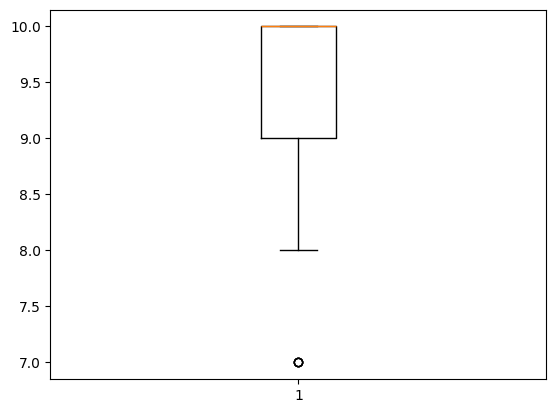

In [127]:
plt.boxplot(df["binary_runs"].iloc[0]);

In [3]:
x = [0.8751956266863484, 0.9054123951562318, 0.9297442442400786, 0.9496700046425871, 0.9663750228624425, 0.9725561224884253, 0.9883150522524399, 0.9934180466863927, 0.9984566313422159, 0.9984566313422159, 0.9984566313422159, 0.9984566313422159, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848,
    0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848, 0.9984590655813848]

In [5]:
len(x)

40